# Section 3 - Bagging
## Section 3.1 

**Objective:**  
Implement a bagging ensemble method to perform regression on a dataset (e.g., Boston housing data).

**Instructions:**
1. Load a regression dataset (e.g., Boston Housing or any other regression dataset).
2. Implement bagging by training multiple regression models on bootstrapped samples of the data.
3. Compare the performance of the bagging model with a single regression model using Mean Squared Error (MSE) or another regression metric.
4. Visualize the predictions of the bagging ensemble.

**Deliverables:**
- Jupyter notebook or Python script with code and comments.
- Comparison table of MSE or other regression metrics for bagging and single regression model.
- Visualizations of bagging ensemble predictions vs. true values.


We import the needed libraries and we define the parameter _num_models_ that we're going to use later

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

num_models = 50

We are going to use the California housing dataset since the Boston one was removed from _sklearn_ since version 1.2.<br>We load the dataset and we divide it into training and testing set:

In [10]:
data = fetch_california_housing()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We create a list to store the predictions of each base model. Then we train multiple regression models on bootstrapped samples and make predictions on the set. At the end we ensemble predictions by averaging the predictions of all base models.

In [12]:
predictions = []

for i in range(num_models):
    bootstrap_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train[bootstrap_indices]
    y_train_bootstrap = y_train[bootstrap_indices]

    model = LinearRegression()
    model.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    predictions.append(y_pred)

ensemble_predictions = np.mean(predictions, axis=0)


We calculate **_MSE (Mean Square Error)_** for a single regression model and then for bagging ensemble. We print the comparisons.

In [32]:
single_model = LinearRegression()
single_model.fit(X_train, y_train)
single_model_pred = single_model.predict(X_test)
single_model_mse = mean_squared_error(y_test, single_model_pred)

bagging_mse = mean_squared_error(y_test, ensemble_predictions)

comparison_table = {
    "Model": ["Single Regression", "Bagging Ensemble"],
    "MSE": [single_model_mse, bagging_mse]
}

pd.DataFrame.from_dict(comparison_table) 

,Model,MSE
0,Single Regression,0.555892
1,Bagging Ensemble,0.555298


In [33]:
print("\nMSE Comparison:")
for row in zip(*comparison_table.values()):
    print("{: <20} {:>10}".format(*row))


MSE Comparison:
Single Regression    0.5558915986952425
Bagging Ensemble     0.5552977867858431


Finally we visualize the predictions:

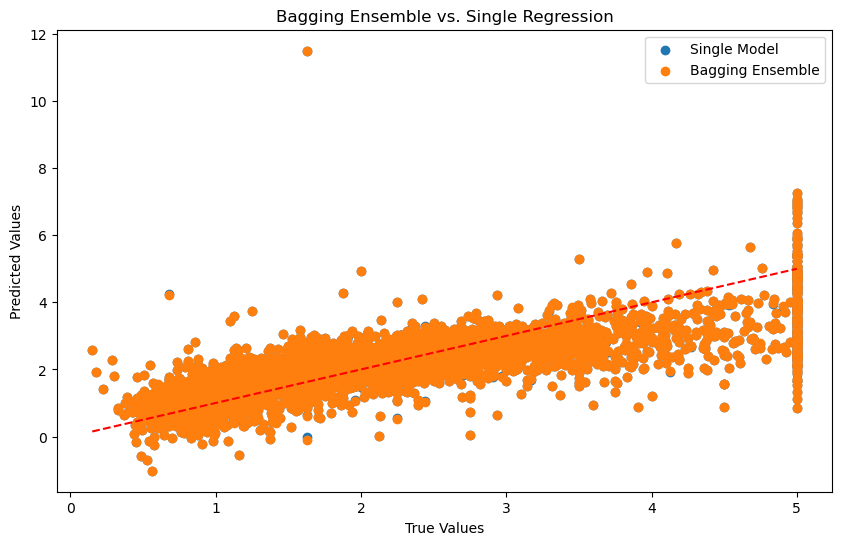

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, single_model_pred, label="Single Model")
plt.scatter(y_test, ensemble_predictions, label="Bagging Ensemble")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Bagging Ensemble vs. Single Regression")
plt.show()